In [2]:
import numpy as np 

n = 10
np.random.randint(1, n + 1, size=n)

array([ 7,  8,  9,  4,  9,  2,  6,  2, 10,  4])

In [3]:
1. - 1. / np.e

0.6321205588285577

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df = pd.read_csv("train.csv")
df.head()

y = df['Survived'].values
del df['Survived']
df['Age'].fillna(df['Age'].mean(), inplace=True)

feature_names = ['Sex', 'Age', 'SibSp', 'Pclass', 'Parch', 'Fare']
df=df[feature_names]

df['Sex'] = (df['Sex'] == 'male').astype(int)

X_train, X_test, y_train, y_test = train_test_split(df, y)

df.head()

,Sex,Age,SibSp,Pclass,Parch,Fare
0,1,22.0,1,3,0,7.2500
1,0,38.0,1,1,0,71.2833
2,0,26.0,0,3,0,7.9250
3,0,35.0,1,1,0,53.1000
4,1,35.0,0,3,0,8.0500


### DecisionTreeClassifier

In [7]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)
print('ROC_AUC:', roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, tree_clf.predict(X_test)))

ROC_AUC: 0.758385041087
Accuracy: 0.77130044843


In [8]:
tree_params = {'max_depth': np.arange(1, 50), 'criterion': ['gini', 'entropy']}

gs_tree = GridSearchCV(tree_clf, tree_params, scoring='roc_auc')

gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [9]:
print('ROC-AUC for optimized tree:',
      roc_auc_score(y_test, gs_tree.best_estimator_.predict_proba(X_test)[:, 1]))

ROC-AUC for optimized tree: 0.87091229247


In [10]:
gs_tree.cv_results_.keys()

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'params'])

<function matplotlib.pyplot.ylabel>

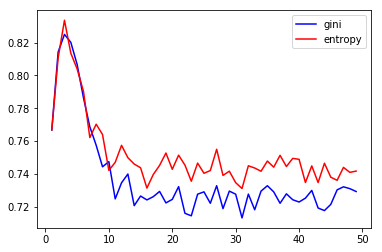

In [11]:
score = gs_tree.cv_results_['mean_test_score']
crit = np.array(gs_tree.cv_results_['param_criterion'])
depth = np.array(gs_tree.cv_results_['param_max_depth'])

idx = crit == 'gini'

plt.plot(depth[idx], score[idx], c='b')
idx = crit == 'entropy'

plt.plot(depth[idx], score[idx], c='r')
plt.legend(['gini', 'entropy'])
plt.xlabel
plt.ylabel

            Decission Tree For Titanic

### RandomForestClassifier

In [12]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
#, criterion='gini', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, max_features='auto', bootstrap=True)

rf_clf.fit(X_train, y_train)
print('ROC_AUC:', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, rf_clf.predict(X_test)))

ROC_AUC: 0.873092403153
Accuracy: 0.829596412556


In [13]:
rf_clf.feature_importances_

array([ 0.25474302,  0.27628188,  0.0463844 ,  0.08297255,  0.03643287,
        0.30318528])

##### Избавимся от "лишних" признаков и померием ROC-AUC еще раз. 

In [13]:
del X_train['Parch']
del X_test['Parch']

del X_train['SibSp']
del X_test['SibSp']

In [18]:
rf_clf.fit(X_train, y_train)

print('ROC_AUC:', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))
print('Accuracy:', accuracy_score(y_test, rf_clf.predict(X_test)))

ROC_AUC: 0.823161189358
Accuracy: 0.80269058296
